INTRODUCTION

Here we have a dataset of the sales data. Goal is to analyze the data to come up with prdeiction of future sales.

 Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

DATA COLLECTION

Data collection is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.

In [186]:
df=pd.read_csv("C:\\Users\\soura\\Documents\\DS_ML_assignments/sales_prediction_data.csv")
df.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [188]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [190]:
df.tail()

,Date,Sales
360,2022-09-26,43.698457
361,2022-09-27,38.827336
362,2022-09-28,38.761570
363,2022-09-29,41.144471
364,2022-09-30,45.529812


In [192]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-10-01 to 2022-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [194]:
df.isnull().sum()

Sales    0
dtype: int64

In [196]:
df.describe()

,Sales
count,365.000000
mean,34.093942
std,6.572683
min,19.002444
25%,29.290376
50%,33.971567
75%,38.647294
max,48.190967


Visualize the Data

<Axes: xlabel='Date'>

<Figure size 1200x800 with 0 Axes>

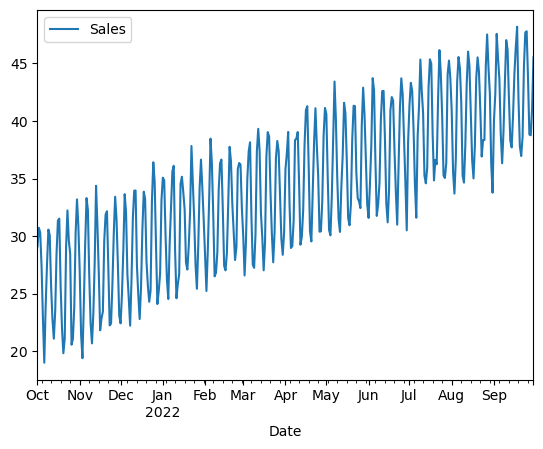

In [199]:
plt.figure(figsize=(12, 8))
df.plot()

In [201]:
df.head()

,Sales
Date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123


In [203]:
# Resample to monthly data and aggregate (e.g., sum)

monthly_data = df.resample('ME').sum()
monthly_data

,Sales
Date,
2021-10-31,823.532848
2021-11-30,804.510501
2021-12-31,885.009821
2022-01-31,964.427710
2022-02-28,894.350630
2022-03-31,1016.779597
2022-04-30,1052.303117
2022-05-31,1122.127370
2022-06-30,1120.265385


C:\Users\soura\AppData\Local\Temp\ipykernel_1880\1309389246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_data, x="Date", y="Sales", palette="bright")


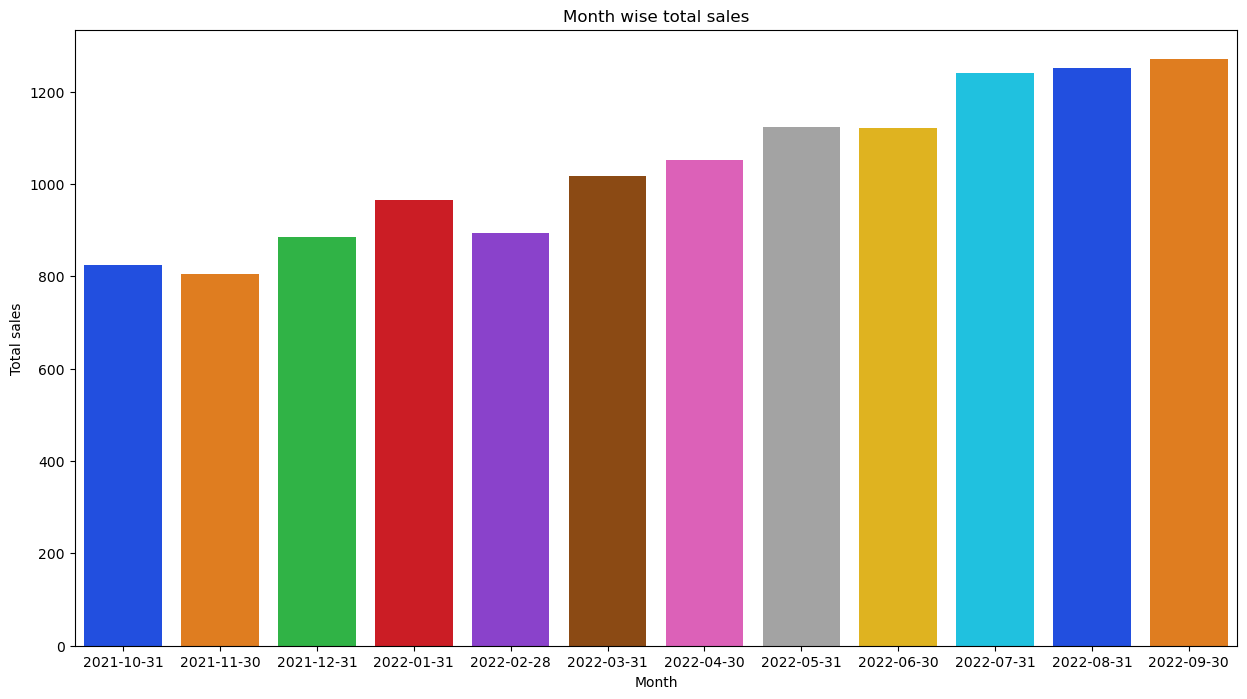

In [205]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_data, x="Date", y="Sales", palette="bright")
#Adding the labels and title
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.title("Month wise total sales")

plt.show()

In [207]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['Sales'])

In [209]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [211]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.3404553171852836
p-value : 0.9791262941384594
#Lags Used : 16
Number of Observations Used : 348
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [214]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Sales'].shift(1)

Date
2021-10-01          NaN
2021-10-02    29.109547
2021-10-03    30.720435
2021-10-04    30.305173
2021-10-05    27.390893
                ...    
2022-09-26    47.796793
2022-09-27    43.698457
2022-09-28    38.827336
2022-09-29    38.761570
2022-09-30    41.144471
Name: Sales, Length: 365, dtype: float64

Auto Regressive Model

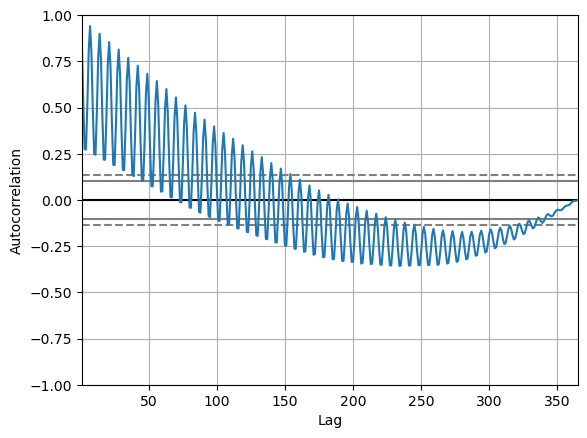

In [217]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [219]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -954.265
Date:                Sat, 15 Mar 2025   AIC                           1912.529
Time:                        17:22:23   BIC                           1920.324
Sample:                    10-01-2021   HQIC                          1915.627
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4547      0.061      7.481      0.000       0.336       0.574
sigma2        11.0751      0.959     11.543      0.000       9.195      12.956
===================================================================================
Ljung-Box (L1) (Q):                  18.55   Jarque-Bera (JB):                 6.38
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               1.01   Skew:                             0.20
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

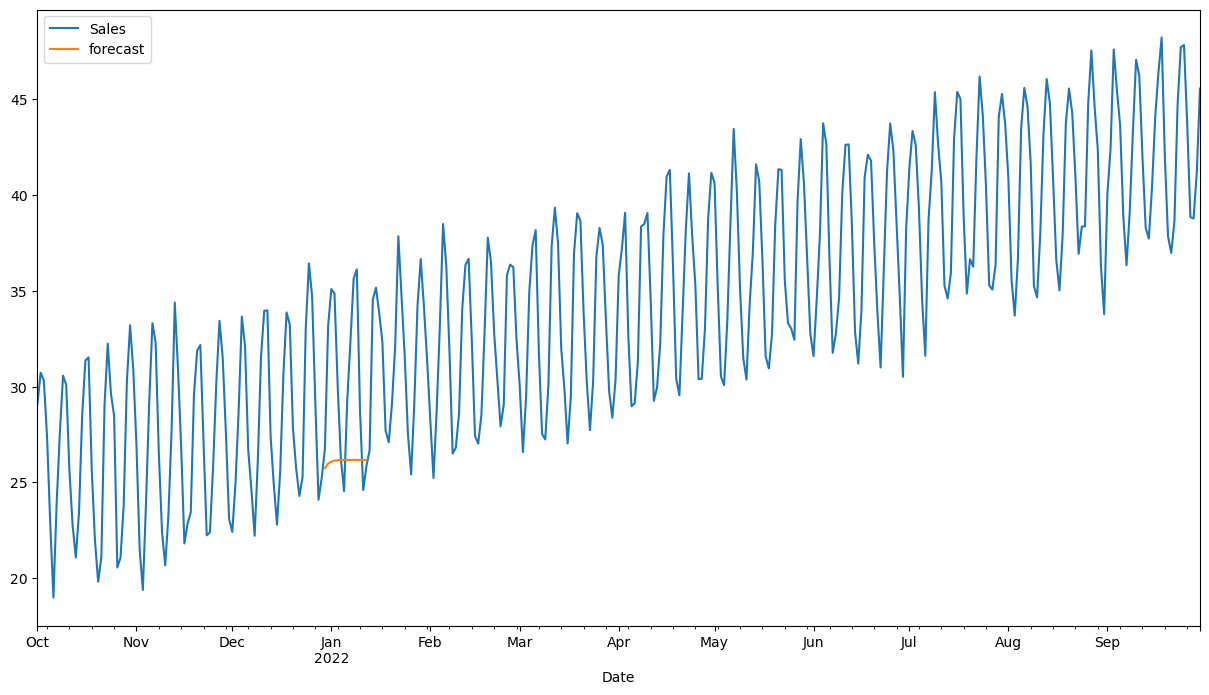

In [221]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(15,8))

C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\soura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

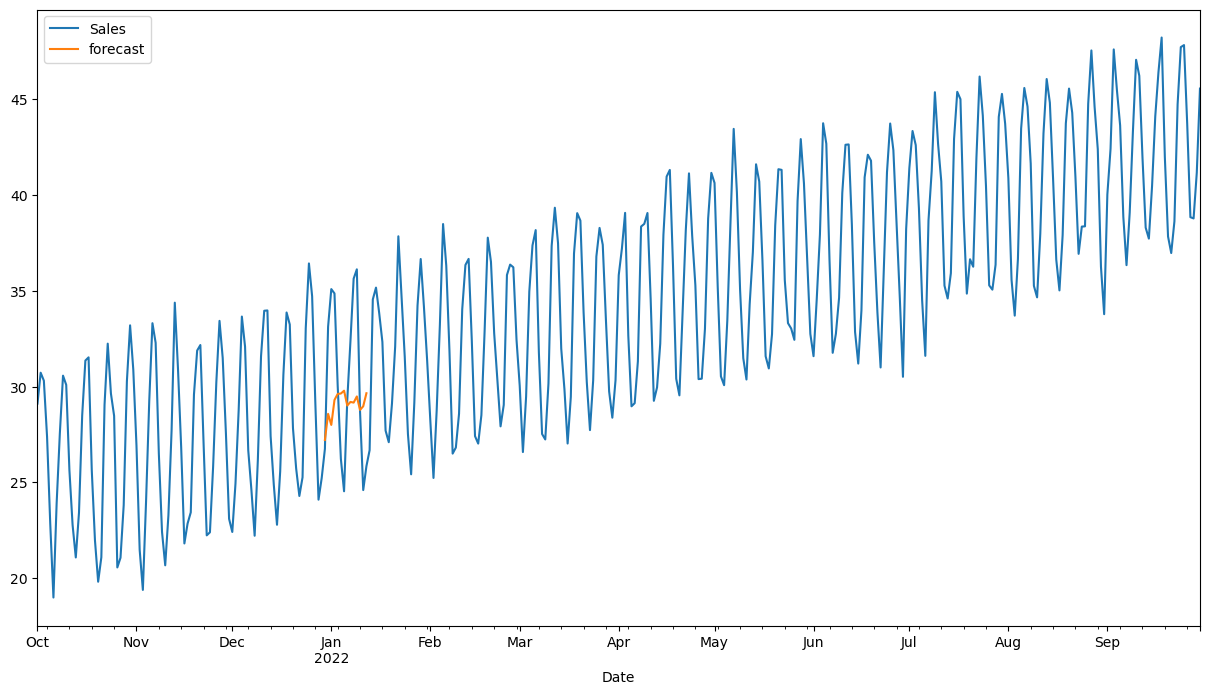

In [223]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(15,8))

In [224]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

,Sales,Sales First Difference,forecast
2024-04-30,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN
2024-06-30,NaN,NaN,NaN
2024-07-30,NaN,NaN,NaN
2024-08-30,NaN,NaN,NaN


In [225]:
future_df=pd.concat([df,future_datest_df])
future_df.tail()

C:\Users\soura\AppData\Local\Temp\ipykernel_1880\297279541.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


,Sales,Sales First Difference,forecast
2024-04-30,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN
2024-06-30,NaN,NaN,NaN
2024-07-30,NaN,NaN,NaN
2024-08-30,NaN,NaN,NaN


<Axes: >

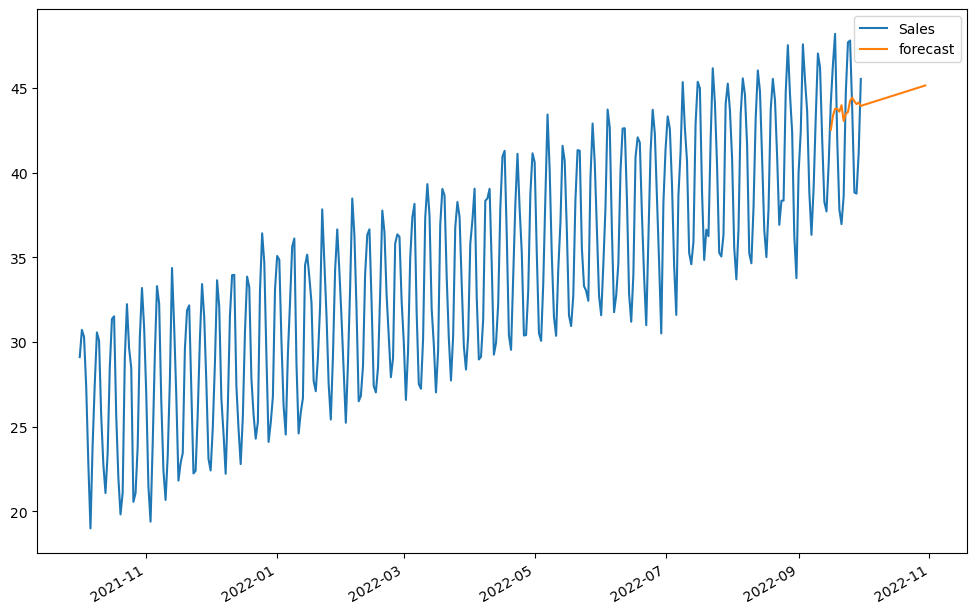

In [238]:
future_df['forecast'] = results.predict(start = 350, end = 400, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 